# Introduction to Neural Networks

## Import packages

In [19]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [22]:
X_train[0].shape

(28, 28)

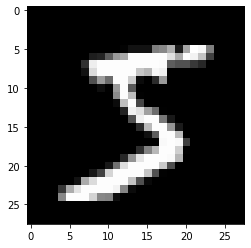

In [23]:
plt.imshow(X_train[0], cmap='gray')

In [24]:
y_train[0]

5

## Preprocessing the image data

In [25]:
image_height, image_width = 28, 28

In [26]:
# to have one layer with 784 neurons across:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Rescaling the data:

In [27]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [28]:
# converting data to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [29]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [30]:
# checking the shape of the output
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [31]:
# to send the output to any of the 10 classification bins (0-9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

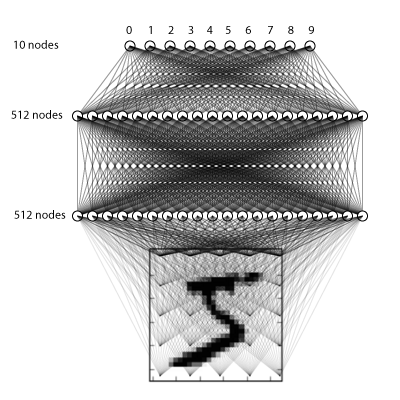

In [32]:
model = Sequential()

In [34]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Compile the model

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [38]:
# how the number of parameters for the first layer are calculated
# 784 pixels * 512 nodes + 512 bias
784 * 512 + 512

401920

In [39]:
# how the number of parameters for the second layer are calculated
# 512 nodes * 512 nodes + 512 bias
512 * 512 + 512

262656

In [40]:
# how the number of parameters for the last layer are calculated
# 512 nodes * 10 nodes + 10 bias
512 * 10 + 10

5130

## Train the model

In [41]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1819 - accuracy: 0.9441 - val_loss: 0.0998 - val_accuracy: 0.9696
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0791 - accuracy: 0.9750 - val_loss: 0.0928 - val_accuracy: 0.9712
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0556 - accuracy: 0.9822 - val_loss: 0.0738 - val_accuracy: 0.9793
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0419 - accuracy: 0.9865 - val_loss: 0.0726 - val_accuracy: 0.9783
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0340 - accuracy: 0.9889 - val_loss: 0.0779 - val_accuracy: 0.9784
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0913 - val_accuracy: 0.9786
Epoch 7/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0885 - val_ac

## What is the accuracy of the model?

### Plot the accuracy of the training model

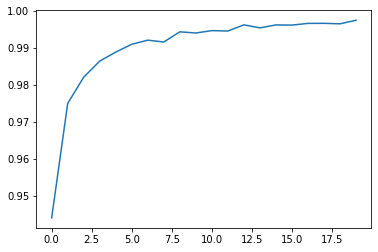

In [43]:
# key should be 'accuracy' not 'acc' as was shown in the video
plt.plot(history.history['accuracy'])

### Plot the accuracy of training and validation set

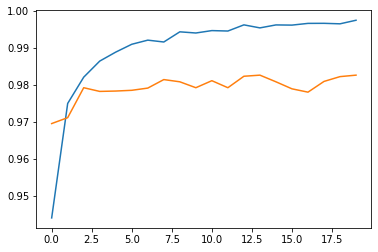

In [44]:
plt.plot(history.history['accuracy'])
# key should be 'val_accuracy' not 'val_acc' as was shown in the video
plt.plot(history.history['val_accuracy'])

### Accuracy of training and validation with loss

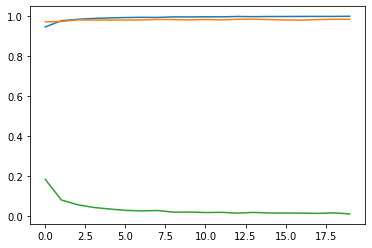

In [45]:
plt.plot(history.history['accuracy'])
# key should be 'val_accuracy' not 'val_acc' as was shown in the video
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

## Evaluating a model

In [46]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1253 - accuracy: 0.9827


In [47]:
score

[0.12530821561813354, 0.982699990272522]